# Welcome to Machine Learning - Week 9
Instructor - Daniel Wiesenfeld

# Convolutional Neural Networks (CNN)

## Contents
- Convolution Layers
- Pooling Layers 
- Building CNNs
- Image Learning Tasks 

## Why are Dense Linear Layers (regular linear layers) not ideal for Images?

Thoughts?

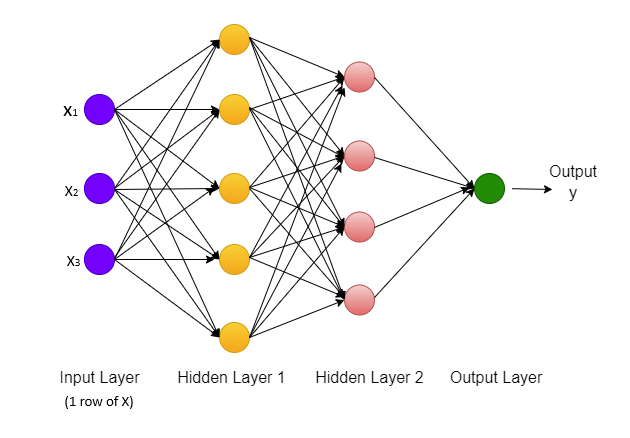

## Convolutional Layers:

A moving kernel (box) that slides over the image and outputs a the sum of the product of its weights and the pixels within the box. (these boxes are also referred to as filters)

Key pytorch parameters:

- `in_channels`: Number of channels of input image (1 if grayscale, 3 or 4 if color) if first hidden layer or the out_channels of the previous convolution layer if later hidden layer (this is analogous to the input dimension of a linear layer)

- `out_channels`: Number of convolutions to create which corresponds to the number of output tensors (this is analogous to the output dimension of a linear layer)

- `kernel_size`: height and width of the convolution (should always be odd)

- `padding`: Number of extra pixels to add around the border of the input image (by default the added pixel values are zero)

- `stride`: Number of pixels steps to take each time the kernel slides (default is 1)

*Note: if padding = (kernel_size - 1) / 2  and stride = 1, the input and output tensors will have the same dimensions.*

Below is a visualization of a 3X3 convolution with a padding size of 1 with a 6 X 5 input image assuming an 1 in_channel and 1 out_channel:

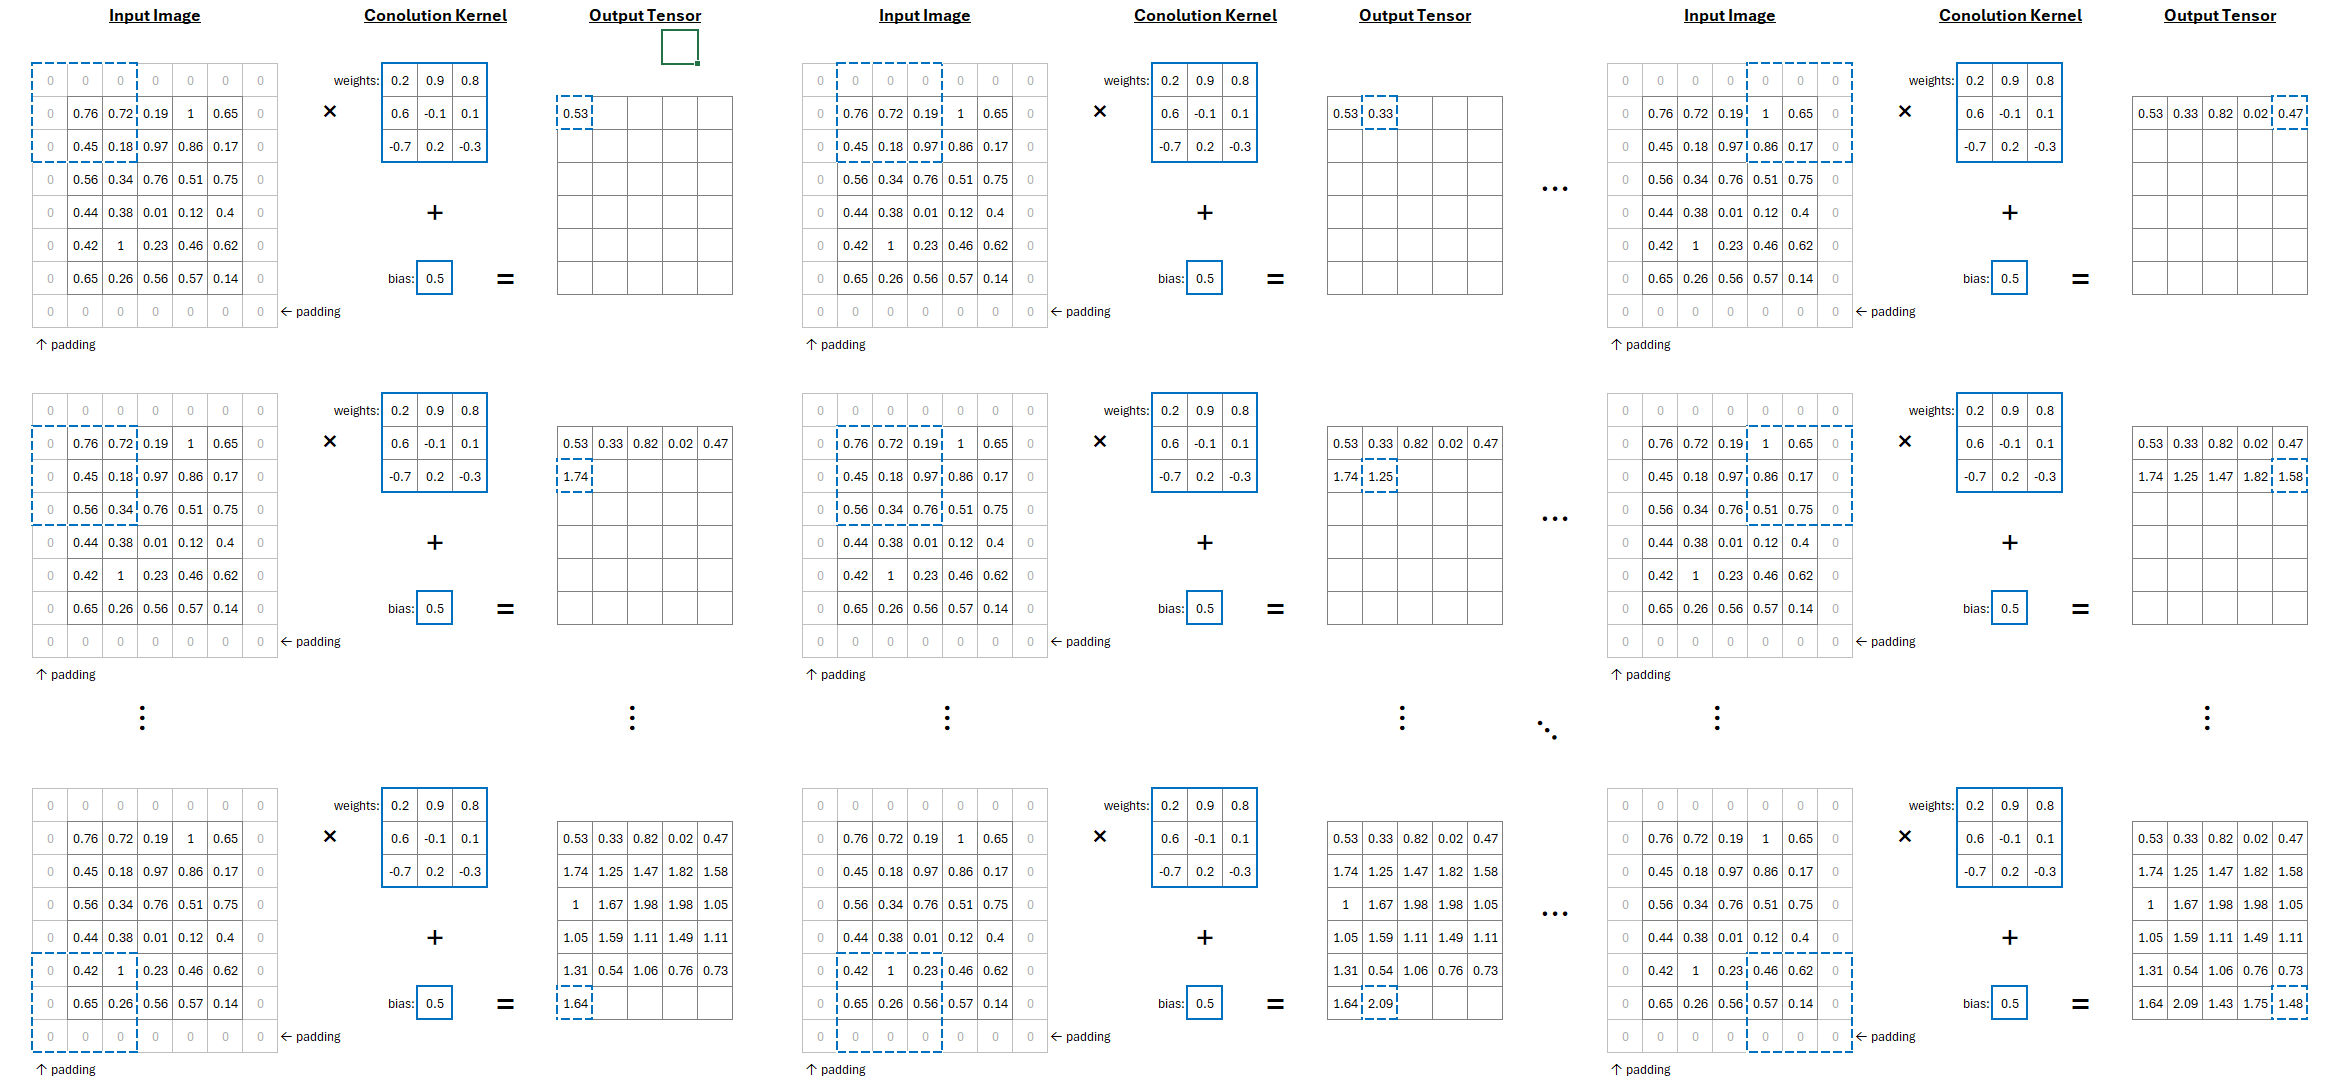

## Why are Convolutions Beneficial?
- Parameter Reduction: Fewer parameters required for the same amount of learning
- Translation Invariance: Convolutions can recognize the same image even if it is shifted or reflected
- Hierarchical Feature Learning: Each cell output by the first convulution, is influenced by `kernel_size` X `kernel_size` pixels of the input image, known as its "receptive field". This allows it to learn small low level features, like texture, edges, and details. Further downstream, the receptive field gets larger because it the it's inputs have their own receptive fields. This allows later convolutions to learn bigger rougher features of the image.

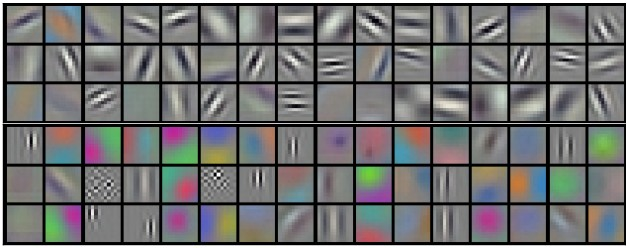

## Pooling Layers:
- Pooling layers are just like convolutions except they don't have weights. They just aggregate a `kernel_size` X  `kernel_size` box of pixels into a single value.
- The most common type of aggregation is the `MAX` function: i.e. it slides over the image and takes just the maximum value from each box.
- Pooling layers are usually used to graduually reduce the dimensions of the tensors

## Two Approaches to building CNNs, both with simplicity in mind

1) Always pad convolution layers to keep the input and output dimensions the same. Use pooling layers to reduce dimensionality

2) Don't use pooling layers at all and use an increased Stride in convolutions to reduce dimensions.
    - Stride is confusing!
    - If you get the math wrong, it will error!

### The Stride Formula:

Let: 
    $$h_{\text{in}} = \text{height of input image}, w_{\text{in}} = \text{width of input image},$$
    $$ h_{\text{out}} = \text{height of output tensor}, w_{\text{out}} = \text{width of output tensor}, $$
    $$k = \text{kernel size}, p = \text{padding size}, s = \text{stride}$$
    
Then:
$$h_{\text{out}} = \frac{h_\text{in} - k + 2p}{s} + 1, \text{where } h_{\text{out}} \text{ must be an integer}$$
and
$$w_{\text{out}} = \frac{w_\text{in} - k + 2p}{s} + 1, \text{where } w_{\text{out}} \text{ must be an integer}$$

### Question:
    Assuming no padding, how much reduction does a stride of 2 achieve?

## Classification, the last step of a CNN

- The final convolutional or pooling layer, must be flattened into a linear layer (also known as FC or fully connected layer, because all neurons are connected to all following neurons)
- Many CNNs will have multiple linear layers
- Last layer will typically be a sigmoid if it's a binary classification, or a softmax if multiclass.

### A Common CNN Layer Pattern:

INPUT $\rightarrow$ [[CONV $\rightarrow$ RELU] $\times \space n \space \rightarrow$ POOL?] $\times \space m \space\rightarrow$ [FC $\rightarrow$ RELU] $\times\space k \space\rightarrow$ FC $\rightarrow$ SIGMOID or SOFTMAX

where $n$ and $k$ are usually < 3.

### An architecture example:
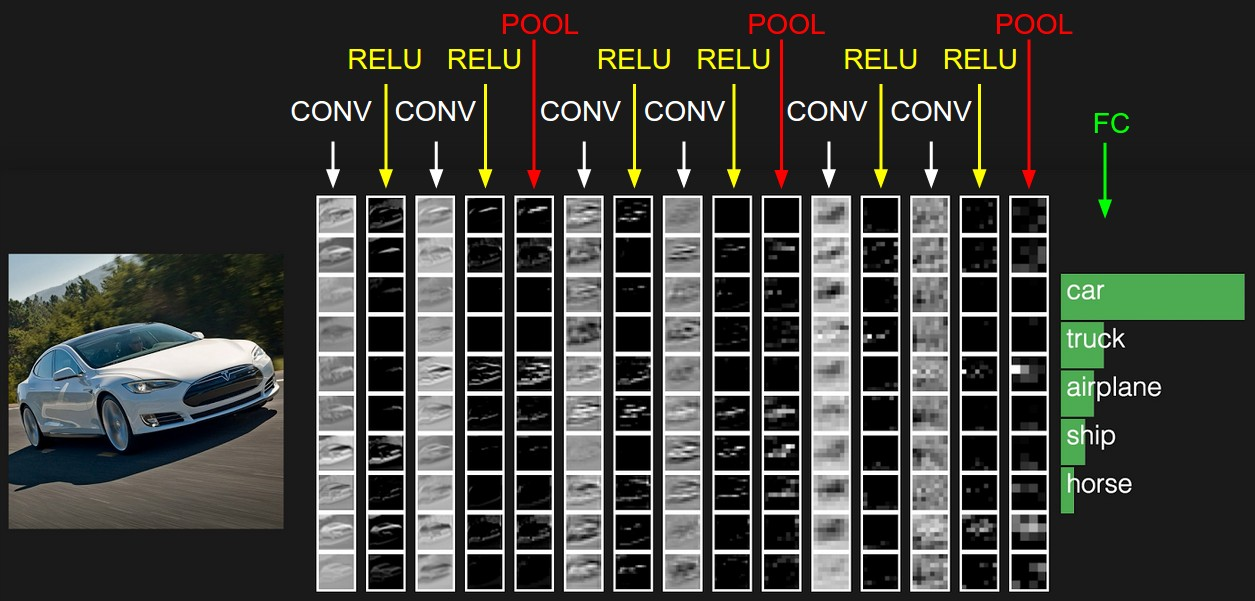

Advice From Stanford (https://cs231n.stanford.edu/):

- Input Layer (Image) should ideally be of a resolution that is divisible by 2 many times, e.g. (32, 64, 96,....512, 1024)
- Convolution Layers should be small 3X3 or 5X5, always odd, only use stride = 1, and always pad with 0's to maintain dimensions (size - 1) / 2.
- Pooling Layers should be used exclusively for downsampling. By setting these to 2X2 and using a stride of 2, you discard 75% of the previous layer dimensions


VGG Net Architecture:
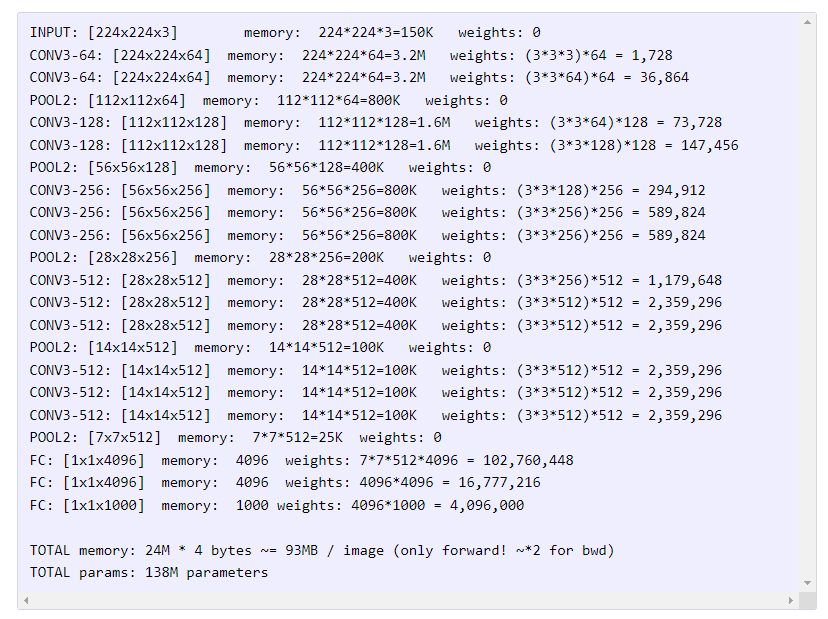
https://cs231n.github.io/convolutional-networks/

## Image Tasks

## Classification

- Determine whether an image is (or contains) a particular class or set of classes
- Usually assumes exactly one class present per image and that at 
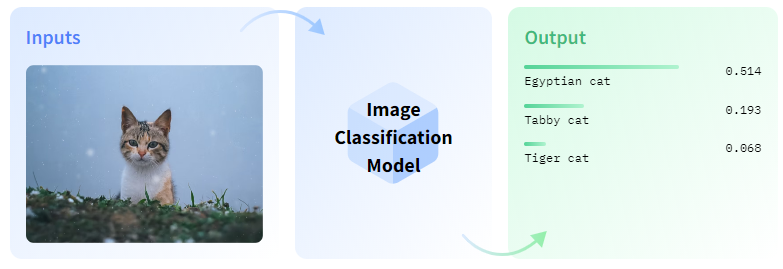
*source: https://huggingface.co/tasks/image-classification*

### Important Models:
- AlexNet: Introdced in 2012, one of the first successful large scale image classification mdoels
- VGGNet: Known for its simplicity and depth, VGGNet uses very small (3x3) convolution filters.
- GoogLeNet (Inception): Utilizes inception modules that apply multiple convolutions at different scales.
- ResNet: Introduces residual connections, allowing for very deep networks by mitigating the vanishing gradient problem.

### Cutting Edge:
- EfficientNet: Uses a compound scaling method to uniformly scale depth, width, and resolution.
- Vision Transformers (ViT): Applies transformer architecture to image patches, leveraging attention mechanisms.
- ConvNeXt: A modernized ResNet that incorporates design elements from Vision Transformers and other recent advance

## Object Detection
- Detect the presence and location (i.e. bounding box coordicates) of classes within an image
- Can be multiple (or no) classes per image
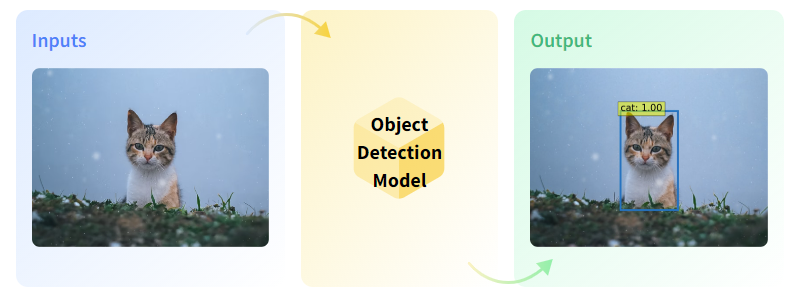
*source: https://huggingface.co/tasks/object-detection*

### Important Models:
- R-CNN (Region-based CNN): Combines region proposals with CNNs for object detection.
- Fast R-CNN and Faster R-CNN: Improvements over R-CNN, with Faster R-CNN introducing a Region Proposal Network (RPN).
- YOLO (You Only Look Once): A real-time object detection system that frames detection as a single regression problem.
- SSD (Single Shot MultiBox Detector): Another real-time approach, predicting object bounding boxes and scores in a single pass.
### Cutting Edge:
- YOLOv4 and YOLOv5: Enhanced versions of YOLO with improved accuracy and speed.
- DETR (Detection Transformer): Uses transformer networks for object detection, simplifying the traditional detection pipeline.
- EfficientDet: Scales efficiently with compound scaling, similar to EfficientNet.


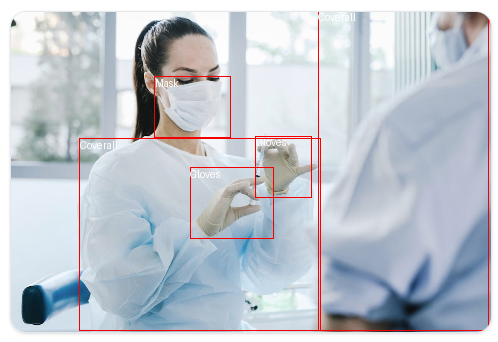
*source: https://huggingface.co/docs/transformers/tasks/object_detection*

## Object Segmentation
- Determines what class every single pixel of the original input image belongs to.
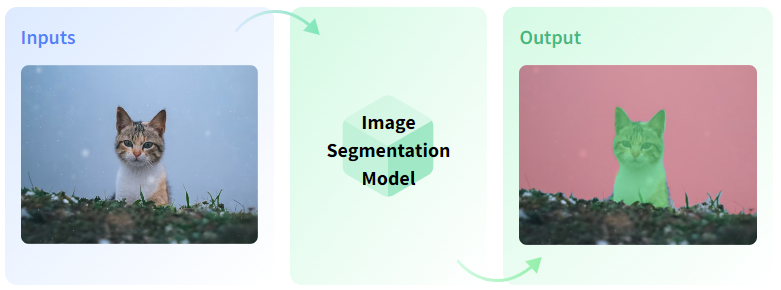
*source: https://huggingface.co/tasks/image-segmentation*

### Semantic Segmentation
- identifies the class of each pixel
### Instance Segmentation
- idenifies which instance of a class each pixel is a part of
### Panoptic Segmentation
- identifies both class and istance of each pixel

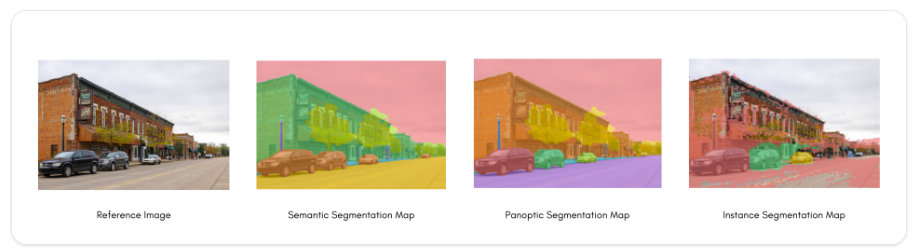
*source: https://huggingface.co/docs/transformers/tasks/semantic_segmentation*

### Important Models:
#### Semantic Segmentation
- FCN (Fully Convolutional Networks): Replaces fully connected layers with convolutional layers to enable segmentation.
- U-Net: Popular in medical image analysis, known for its U-shaped architecture with skip connections.

#### Instance Sgementation
- Mask R-CNN: Extends Faster R-CNN by adding a branch for predicting segmentation masks on each region of interest (RoI).
- PANet (Path Aggregation Network): Improves mask prediction accuracy by enhancing feature pyramid networks.

#### Panoptic Segmentation
- Panoptic FPN (Feature Pyramid Networks): Combines instance and semantic segmentation into a single framework.
- Panoptic-DeepLab: Uses DeepLab's segmentation approach for both instance and semantic segmentation, merging results into panoptic segmentation.

### Cutting Edge:
- SegFormer: Transformer-based architecture for semantic segmentation, providing high accuracy and efficiency.
- Swin Transformer: Hierarchical vision transformer that can be applied to both segmentation and detection tasks.
- YOLOv9 (segmentation extensions such as YOLOv9c-seg and YOLOv9e-seg)

## Image Generation
- Generate new images

### Unconditional Image Generation
- Generate an random image that resembles the training images

### Text to image
- Generate an image based on a text prompt

### Image to Image
- Apply some form of change or transformation to an image



### Important Models:
- GANs (Generative Adversarial Networks): Consist of a generator and discriminator network in a game-theoretic setting, generating realistic images.
- Variational Autoencoders (VAEs): Probabilistic graphical models that generate images by sampling from learned distributions.
### Cutting Edge:
- StyleGAN2: An improved version of GANs, known for generating high-fidelity and high-resolution images.
- BigGAN: A scalable GAN architecture that generates high-quality images using large batch sizes.
- DALL-E: Uses transformers to generate images from textual descriptions, showcasing impressive creative capabilities.
- Diffusion Models: A new family of generative models that iteratively denoise a Gaussian-distributed variable to generate images

#### Diagram of GAN:
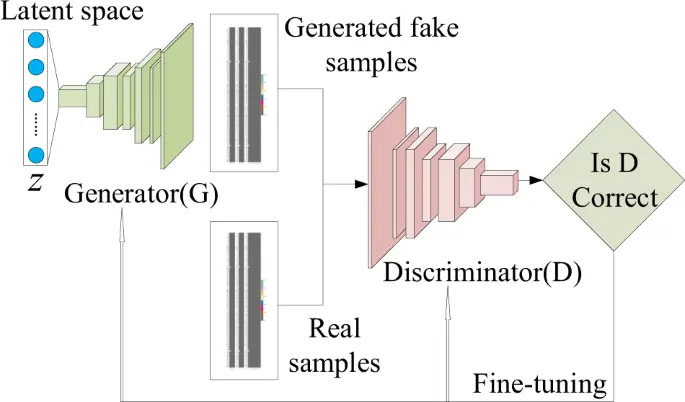
*source: https://www.labellerr.com/blog/what-is-gan-how-does-it-work/*